<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/DL_Count_based_word_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://wikidocs.net/31767

를 기반으로 정리한 내용입니다

---------------------

# 카운트 기반의 단어 표현(Count based word Representation)

자연어 처리에서 텍스트를 표현하는 방법으로는 여러가지 방법이 있습니다. 이번 챕터에서는 그 중 정보 검색과 텍스트 마이닝 분야에서 주로 사용되는 카운트 기반의 텍스트 표현 방법인 DTM(Document Term Matrix)과 TF-IDF(Term Frequency-Inverse Document Frequency)에 대해서 다룹니다.

텍스트를 위와 같은 방식으로 수치화를 하고나면, 통계적인 접근 방법을 통해 여러 문서로 이루어진 텍스트 데이터가 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내거나, 문서의 핵심어 추출, 검색 엔진에서 검색 결과의 순위 결정, 문서들 간의 유사도를 구하는 등의 용도로 사용할 수 있습니다.

### 1. 단어의 표현 방법
- 국소 표현(Local Representation) : 국소 표현 방법은 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법
- 분산 표현(Distributed Representation) : 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법

예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다면 이는 국소 표현 방법에 해당됨.

분산표현은 단어의 뉘앙스 표현가능.  puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의가능.

### 2. 단어 표현의 카테고리화

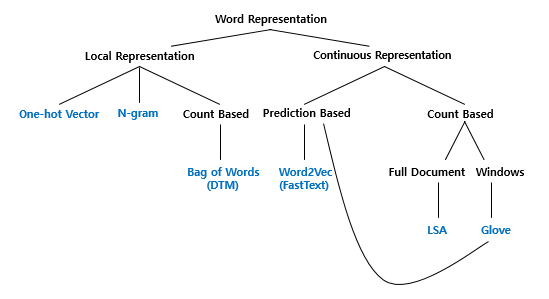

# 2) Bag of Words(BoW)

- Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. 
- Bag of Words를 직역하면 단어들의 가방이라는 의미입니다. 
- 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그 후에는 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

(1) 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.

(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다. 

문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab) # 각 단어에 고유한 정수 인덱스를 부여
print('bag of words vector :', bow) # BoW 란 bag_of_words / 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
# 문서1과 문서2를 합쳐서 문서 3이라고 명명하고, BoW를 만들 수도 있다
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


##  CountVectorizer 클래스로 BoW 만들기

CountVectorizer로 간단하고 빠르게 BoW를 만든다


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## 불용어를 제거한 BoW 만들기

영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원하고 있습니다.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
#1 사용자가 직접 정의한 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])  # 불용어 직접입력
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
#2 CountVectorizer에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [ ]:
#3 NLTK에서 지원하는 불용어 사용
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}
